In [7]:
import pydrake

# python libraries
import numpy as np
import matplotlib.pyplot as plt

# pydrake imports
from pydrake.all import (Variable, SymbolicVectorSystem, DiagramBuilder,
                         LogOutput, Simulator, ConstantVectorSource,
                         MathematicalProgram, Solve, SnoptSolver, PiecewisePolynomial)

# increase default size matplotlib figures
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 5)

In [17]:
class Environment(object):
    def __init__(self, length, width, obstacles):
        
        # store length and width of rectangular environment
        self.length = length
        self.width = width
        self.obstacles = obstacles
        
class Obstacle(object):
    def __init__(
        self,
        position,      # position of the object in the 2d universe
        radius=np.nan, # radius of the planet in m (optional)
    ):
    
        # store the data 
        self.position = position
        self.radius = radius

In [18]:
np.random.seed(0)
n_obstacles = 10
obstacles = []
for i in range(n_obstacles):
    obstacles.append(
        Obstacle(
            np.random.randn(2) * 10 + [0, 0], # distance wrt initial AV 
            np.abs(np.random.randn()) * 2,          # radius danger area 
        )
    )

In [19]:
environment = Environment(30, 10, obstacles)

In [13]:
def plot_environment(environment):
    pass

def plot_circle(center, radius, *args, **kwargs):
    
    # discretize angle
    angle = np.linspace(0, 2*np.pi)
    
    # plot circle
    plt.plot(
        center[0] + radius * np.cos(angle),
        center[1] + radius * np.sin(angle),
        *args,
        **kwargs
    )

In [31]:
def plot_obstacles(environment):
    for obstacle in environment.obstacles:
        
        # plot obstacles
        plt.scatter(*obstacle.position, s=100, c="red")
        plt.text(*obstacle.position, 'dangerous')
    
        # plot orbits
        
        plot_circle(
            obstacle.position,
            obstacle.radius,
            label="hi",
            color="blue",
            linestyle='--'
        )

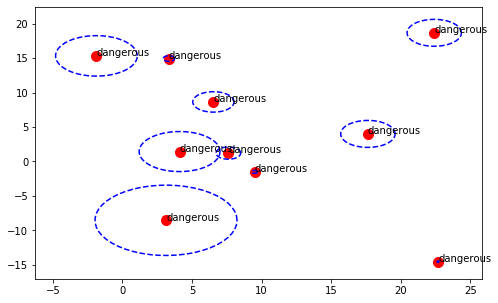

In [32]:
plot_obstacles(environment)
plt.show()